In [2]:
import sys
import os
sys.path.append('C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\python_functions\\jl_nlp_pkg')
sys.path.append('C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\python_functions\\jl_model_explain_pkg')
import nlpbasic.textClean as textClean
import nlpbasic.docVectors as DocVector
import nlpbasic.dataExploration as DataExploration
import nlpbasic.lda as lda
import nlpbasic.tfidf as tfidf

import model_explain.plot as meplot
import model_explain.shap as meshap

from numpy import array,asarray,zeros
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import re
pd.set_option('display.max_colwidth', None)
root_path = 'C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\NLP_data'

In [3]:
raw_data = pd.read_csv(os.path.join(root_path, "covid-19_articles_data.csv"))

In [4]:
raw_data['len'] = raw_data.text.apply(lambda x: len(x.split()))

In [5]:
raw_data.len.describe()

count    33324.000000
mean       210.512063
std         54.460877
min         30.000000
25%        175.000000
50%        209.000000
75%        245.000000
max       1104.000000
Name: len, dtype: float64

In [6]:
raw_data.sentiment.value_counts()

1    20831
0    12493
Name: sentiment, dtype: int64

In [7]:
print(raw_data.text[0])

If you've recently heard from an old friend, you're not alone. A communication studies professor says he's not surprised that people are looking to reconnect with others they were once close to. “This is an utter reshuffling of people's social lives, in a way that's very, very dramatic and probably different than anything we've ever seen before,” said Dr. Jeffrey Hall, Professor of Communication Studies at the University of Kansas. Dr. Hall has been working with colleagues to collect data on how people are getting social needs met while in quarantine. One thing they've found so far is that taking the initiative to reach out can improve mental health. Dr. Hall has also been exploring why we don't normally keep in touch, even though it's easier than ever with technology. He says we typically get enough social interaction just through casual conversations with others, like at work or in your neighborhood. However, that's changed. “We don't have that,” said Dr. Hall. “So, what that means i

In [8]:
print(raw_data[raw_data.len==30].text)

8657    28. "I know how the White House works, I guess I can say now, better than anybody. " Always. Has. To. Be. The. Best. 29. "They spied on my campaign.
Name: text, dtype: object


In [10]:
raw_data = raw_data[['text','sentiment','len']]
raw_data['doc_id'] = raw_data.index
train_index, test_index= train_test_split(raw_data['doc_id'] , test_size = 0.33, random_state = 42)
train_index.head(3)

In [11]:
raw_data.head(3)

,text,sentiment,len,doc_id
0,"If you've recently heard from an old friend, you're not alone. A communication studies professor says he's not surprised that people are looking to reconnect with others they were once close to. “This is an utter reshuffling of people's social lives, in a way that's very, very dramatic and probably different than anything we've ever seen before,” said Dr. Jeffrey Hall, Professor of Communication Studies at the University of Kansas. Dr. Hall has been working with colleagues to collect data on how people are getting social needs met while in quarantine. One thing they've found so far is that taking the initiative to reach out can improve mental health. Dr. Hall has also been exploring why we don't normally keep in touch, even though it's easier than ever with technology. He says we typically get enough social interaction just through casual conversations with others, like at work or in your neighborhood. However, that's changed. “We don't have that,” said Dr. Hall. “So, what that means is we basically have a huge gap of people who we would normally make sense of the world with, and that's being replaced by either the people who are in our households, or people who we have, prior to, not seen very often.",1,208,0
1,"Dr. Hall says it makes sense that we would reach out to people we've had strong ties to. That's because if it has to be through phone calls or texts, we'd rather connect with someone we really want to talk to. Maintaining a rekindled friendship comes down to making a habit of it, in whatever your new normal routine may be. That could be as simple as making plans to talk once a month. Oklahoma State linebacker Amen Ogbongbemiga announced he has tested positive for COVID-19 after attending a protest rally in Tulsa. After attending a protest in Tulsa AND being well protective of myself, I have tested positive for COVID-19. Please, if you are going to protest, take care of yourself and stay safe. — Amen Ogbongbemiga (@closedprayer) June 3, 2020 Recent Stories from 10news. com PLAY Top Videos San Diego businesses trying to survive the purple tier Video Settings Auto Full Screen About Connatix V78152 Watch More Watch More Watch More Watch More Watch More Watch More 1 min. story Skip 1/1 SPONSORED Visit Advertiser website GO TO PAGE / Coming Next Skip Ad In a tweet sent out on Tuesday night, the redshirt senior also wrote that he was protective of himself while attending the protest.",1,209,1
2,"""Please, if you are going to protest, take care of yourself and stay safe,"" Ogbongbemiga said. Before the news, the Cowboys released a safe return plan for it's football student-athletes and indicted what would happen if a player tested positive for COVID-19: If a student-athlete, coach or support staff member tests positive for COVID-19, they will enter the quarantine protocol per medical, local/state health department and university guidelines and will begin to receive the appropriate monitoring and treatment from the team physician, athletic training staff and any other medical consultants. The positive student-athlete will be moved to separate housing designated by OSU for quarantine purposes. Appropriate contact tracing as per local/state health department and university guidelines will begin and all that have been in contact will be instructed to quarantine and have symptoms monitored for a period determined by health and medical officials. Contact tracing will begin with the student-athlete’s cohort/workout group. After the determined quarantine time, if the traced contact group is not showing symptoms, they will be retested for COVID-19 prior to resuming activities. Upon receiving a negative test, they will await specific instructions from the team physician and/or the athletic training staff regarding a return to activities. Upon recognition of symptomatic student-athletes and/or staff in the west end zone facility, the person will immediately be referred and directed to OSU University Health 

## TFIDF / XGBoost

In [13]:
data = raw_data.copy()

In [15]:
data['token'] = textClean.pipeline(raw_data['text'].to_list(), multi_gram = [1], lower_case=True, deacc=False, encoding='utf8',
                                   errors='strict', stem_lemma = 'lemma', tag_drop = [], nltk_stop=True, 
                                   stop_word_list=[], remove_pattern = [],
                                   check_numbers=True, word_length=2, remove_consecutives=True)

In [16]:
top_10_freq_words = [i[0] for i in DataExploration.get_topn_freq_bow(data['token'].to_list(), topn = 10)]
print(top_10_freq_words)

['say', 'people', 'covid', 'state', 'trump', 'new', 'coronavirus', 'health', 'case', 'test']


In [17]:
top30tfidf = tfidf.get_top_n_tfidf_bow(data['token'].to_list(), top_n_tokens = 30)
print('top 30 tfidf', top30tfidf)

top 30 tfidf ['aguirre', 'zipcar', 'emoji', 'lindell', 'rabbit', 'barbosa', 'regal', 'kuehl', 'lobster', 'percent', 'unno', 'ge', 'suicide', 'lysol', 'mall', 'disney', 'pier', 'gallego', 'bihar', 'sikh', 'shark', 'cbd', 'huawei', 'que', 'refinance', 'caterpillar', 'sears', 'fuentes', 'townes', 'blackrock']


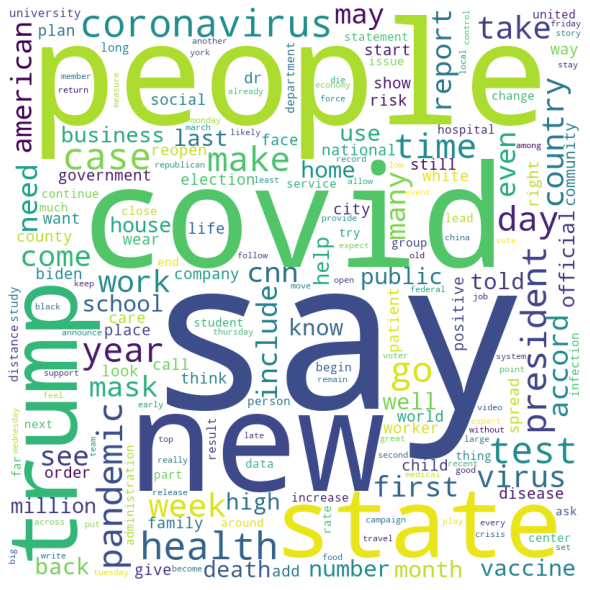

In [18]:
DataExploration.generate_word_cloud(data['token'].to_list())

In [19]:
no_topics = 10
lda_allbow, bow_corpus, dictionary = lda.fit_lda(data['token'].to_list(), num_topics = no_topics)
lda.lda_topics(lda_allbow)

,Topics,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,1,trump,president,biden,election,make,campaign,american,would,year,country
1,2,school,state,student,people,child,covid,election,health,ballot,voter
2,3,case,new,death,day,covid,state,report,number,city,hospital
3,4,trump,state,president,mask,coronavirus,people,health,house,case,wear
4,5,mask,people,country,travel,make,also,go,get,new,covid
5,6,company,year,business,pandemic,million,job,market,worker,also,covid
6,7,county,people,health,covid,new,city,los,home,angeles,get
7,8,test,covid,vaccine,health,coronavirus,people,virus,case,positive,disease
8,9,state,republican,senate,would,democrat,house,bill,business,week,pelosi
9,10,go,year,like,people,time,get,know,think,make,take


In [33]:
tfidf_data = tfidf.get_tfidf_dataframe(data['token'].to_list(), 
                                       doc_index = list(data.doc_id),
                                       no_below =5, 
                                       no_above = 0.5, 
                                       keep_n = 100000)

In [28]:
tfidf_data.columns = ['doc_id'] + [i[1] for i in tfidf_data.columns][1:]
tfidf_data.head(3)

,doc_id,____________________________________________________,_______________________________________________________,__________________________________________________________,___________________________________________________________,______________________________________________________________________,________________________________________________________________________,_____________________________________________________________________________,_______________________________________________________________________________,_______________________________________________________________________________________________,...,zoo,zoom,zoonosis,zoonotic,zucker,zuckerberg,zunyou,zurich,zverev,zw
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
tfidf_data = tfidf_data.pivot(index=['doc_id'], columns='bow').fillna(0).reset_index()
tfidf_data.columns = ['doc_id'] + [i[1] for i in tfidf_data.columns][1:]
tfidf_data.head(3)

,doc_id,____________________________________________________,_______________________________________________________,__________________________________________________________,___________________________________________________________,______________________________________________________________________,________________________________________________________________________,_____________________________________________________________________________,_______________________________________________________________________________,_______________________________________________________________________________________________,...,zoo,zoom,zoonosis,zoonotic,zucker,zuckerberg,zunyou,zurich,zverev,zw
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
tfidf_data['sentiment'] = data.sentiment

In [36]:
X_train = tfidf_data[tfidf_data.doc_id.isin(train_index)].drop(columns = ['doc_id','sentiment'])
X_test = tfidf_data[tfidf_data.doc_id.isin(test_index)].drop(columns = ['doc_id','sentiment'])
y_train = tfidf_data[tfidf_data.doc_id.isin(train_index)][['sentiment']]
y_test = tfidf_data[tfidf_data.doc_id.isin(test_index)][['sentiment']]

In [39]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = X_train.columns)
dtest = xgb.DMatrix(X_test,  label = y_test,  feature_names = X_test.columns)
evallist = [(dtrain,'train'), (dtest,'validation')]
# specify parameters via map
param = {'objective':'binary:logistic',
         'max_depth':6,
         'learning_rate': 0.3,
         'eval_metric': 'auc',
         'subsample': 1,
         'colsample_bytree': 1,
         'colsample_bylevel': 1,
         'reg_alpha': 0,                  # 0.0  (L1 regularization)
         'reg_lambda': 1,                 # 1.0  (L2 regularization)
         'min_split_loss': 0,
         'min_child_weight': 1,
         'silent': 1
        }

num_round = 100
early_stop_round = 50
train_monitor = dict()
xgbmodel = xgb.train(param, 
                     dtrain, 
                     num_boost_round = num_round,
                     evals = evallist, 
                     verbose_eval = 10,
                     early_stopping_rounds = early_stop_round,
                     evals_result = train_monitor
                    )

[19:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.70681	validation-auc:0.69187
[10]	train-auc:0.88895	validation-auc:0.84561
[20]	train-auc:0.93064	validation-auc:0.87643
[30]	train-auc:0.95318	validation-auc:0.89309
[40]	train-auc:0.96553	validation-auc:0.90236
[50]	train-auc:0.97405	validation-auc:0.90880
[60]	train-auc:0.98077	validation-auc:0.91441
[70]	train-auc:0.98516	validation-auc:0.91809
[80]	train-auc:0.98817	validation-auc:0.92065
[90]	train-auc:0.99047	validation-auc:0.92377
[99]	train-auc:0.99219	validation-auc:0.92624


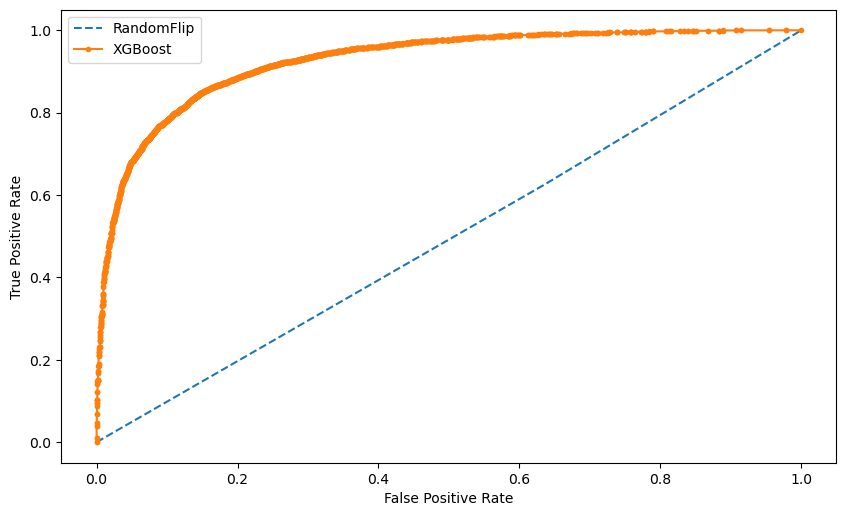

In [43]:
#Check Model Performance on the test set
y_pred = xgbmodel.predict(dtest)
meplot.plot_randomfp_roc(X_train, y_train, X_test, y_test, xgbmodel.predict(dtest), model_label = 'XGBoost')    

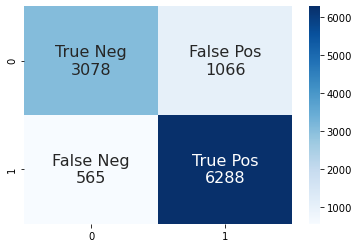

In [45]:
cf_matrix = confusion_matrix(y_test, np.round(y_pred))
meplot.cf_matrix_heatmap(cf_matrix)

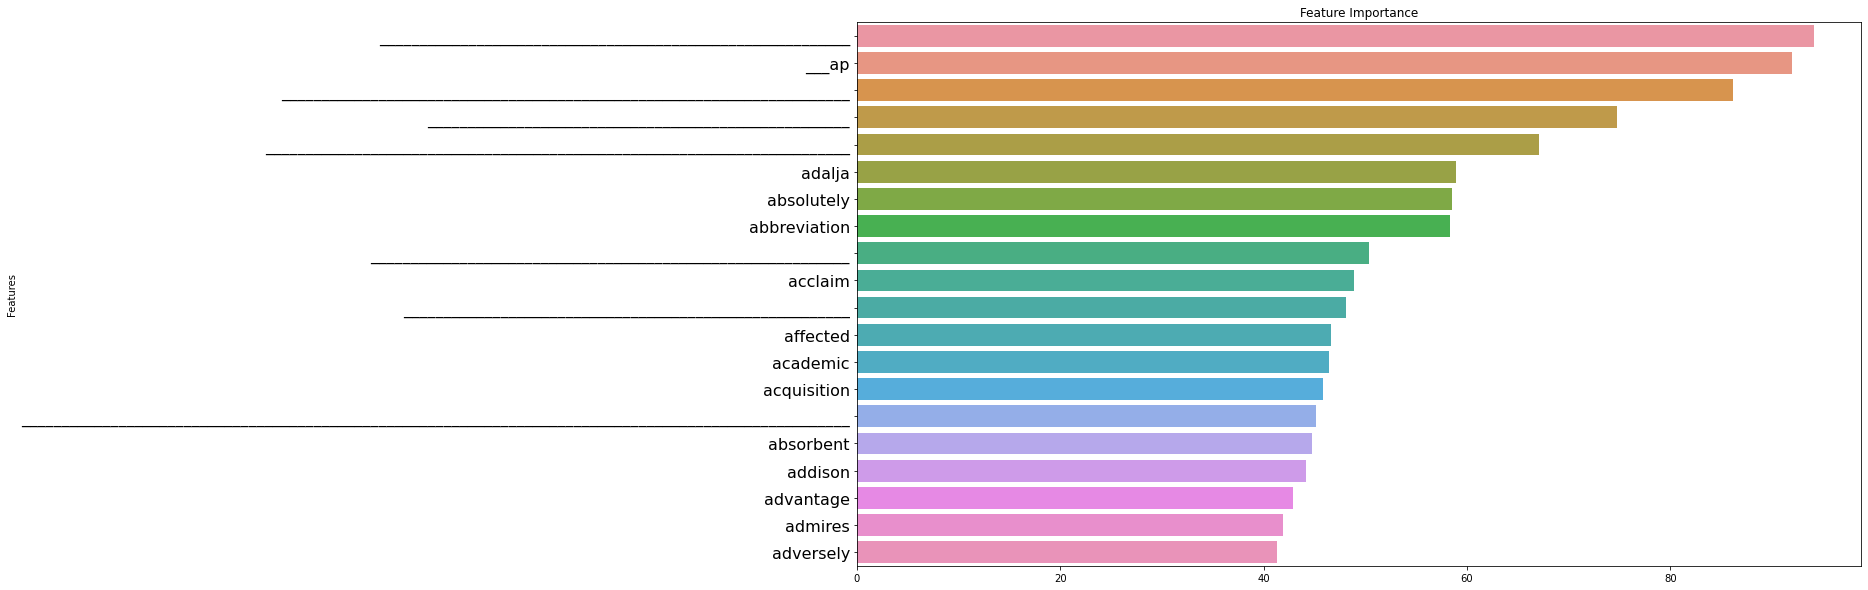

In [46]:
variable_importance = np.array(list(xgbmodel.get_score(importance_type='gain').values()))
meplot.plot_var_imp(variable_importance, X_train.columns, 20)

In [47]:
print(classification_report(y_test, np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      4144
           1       0.86      0.92      0.89      6853

    accuracy                           0.85     10997
   macro avg       0.85      0.83      0.84     10997
weighted avg       0.85      0.85      0.85     10997



## Word Embedding / RNN

In [80]:
X_train = data[data.index.isin(train_index)][['text']]
X_test = data[data.index.isin(test_index)][['text']]
y_train = data[data.index.isin(train_index)]['sentiment']
y_test = data[data.index.isin(test_index)]['sentiment']
X_train = [i for i in X_train.text]
X_test = [i for i in X_test.text]

In [70]:
max_length = int(raw_data.len.quantile(0.99))
max_length

345

In [81]:
t = Tokenizer()
t.fit_on_texts(X_train)

vocab_size = len(t.word_index) + 1
encoded_docs = t.texts_to_sequences(X_train)
padded_docs = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')
print('Encoding:\n', encoded_docs[0])
print('\nText:\n', list(X_train)[0])
print('\nWord Indices:\n', [(t.index_word[i], i) for i in encoded_docs[0]])
encoded_test_doc = t.texts_to_sequences(X_test)
padded_test_docs = pad_sequences(encoded_test_doc, maxlen = max_length, padding = 'post')

Encoding:
 [55, 1810, 611, 1300, 20, 30, 402, 1936, 400, 26, 932, 5, 2604, 910, 902, 118, 501, 26, 3214, 7, 32, 13, 594, 2, 13314, 12, 315, 33, 51, 466, 316, 2, 2955, 9, 30, 11625, 28986, 4, 1918, 139, 337, 6, 5, 163, 184, 143, 143, 2956, 3, 1028, 326, 48, 861, 578, 561, 327, 111, 128, 11, 165, 5774, 1505, 902, 4, 2604, 910, 17, 1, 190, 4, 2864, 165, 1505, 19, 41, 267, 12, 1517, 2, 3729, 169, 10, 94, 32, 13, 350, 139, 569, 1421, 96, 6, 550, 52, 546, 1254, 323, 67, 281, 9, 7, 403, 1, 2189, 2, 1088, 69, 53, 1937, 1065, 44, 165, 1505, 19, 50, 41, 4977, 374, 25, 149, 2062, 271, 6, 1868, 101, 348, 70, 2093, 48, 561, 12, 984, 22, 118, 25, 1386, 89, 438, 139, 4361, 85, 147, 8907, 2298, 12, 315, 80, 17, 129, 35, 6, 112, 2924, 394, 184, 1288, 1213, 149, 15, 7, 128, 11, 165, 1505, 5493, 78, 7, 573, 9, 25, 3154, 15, 5, 1123, 2524, 4, 32, 38, 25, 61, 2062, 127, 882, 4, 1, 142, 12, 3, 184, 132, 4253, 27, 823, 1, 32, 38, 13, 6, 59, 2112, 35, 32, 38, 25, 15, 1240, 2, 26, 327, 143, 545]

Text:
 If you

In [82]:
# load the whole embedding into memory
embeddings_index = dict()
# download glove word embedding first and then load it with the following code
f = open('C:/ProgramData/Anaconda3/append_file/glove/glove.6B.100d.txt', encoding = 'utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close
print('loaded %s word vectors.' % len(embeddings_index))


loaded 400000 word vectors.


In [83]:
# Initialize a matrix with zeros having dimensions equivalent to vocab size and 100
embedding_matrix = zeros((vocab_size, 100))
for word, idx_word in t.word_index.items():
    word_vector = embeddings_index.get(word)
    if word_vector is not None:
        embedding_matrix[idx_word] = word_vector
print('word:', t.index_word[1])
print('Embedding:\n', embedding_matrix[1])
print('length of embedding matrix is:', len(embedding_matrix))
print('vocabulary size is %s.' % vocab_size)

word: the
Embedding:
 [-0.038194   -0.24487001  0.72812003 -0.39961001  0.083172    0.043953
 -0.39140999  0.3344     -0.57545     0.087459    0.28786999 -0.06731
  0.30906001 -0.26383999 -0.13231    -0.20757     0.33395001 -0.33848
 -0.31742999 -0.48335999  0.1464     -0.37303999  0.34577     0.052041
  0.44946    -0.46970999  0.02628    -0.54154998 -0.15518001 -0.14106999
 -0.039722    0.28277001  0.14393     0.23464    -0.31020999  0.086173
  0.20397     0.52623999  0.17163999 -0.082378   -0.71787    -0.41531
  0.20334999 -0.12763     0.41367     0.55186999  0.57907999 -0.33476999
 -0.36559001 -0.54856998 -0.062892    0.26583999  0.30204999  0.99774998
 -0.80480999 -3.0243001   0.01254    -0.36941999  2.21670008  0.72201002
 -0.24978     0.92136002  0.034514    0.46744999  1.10790002 -0.19358
 -0.074575    0.23353    -0.052062   -0.22044     0.057162   -0.15806
 -0.30798    -0.41624999  0.37972     0.15006    -0.53211999 -0.20550001
 -1.25259995  0.071624    0.70564997  0.49744001 -

#### RNN

In [84]:
model = Sequential(
    [
        Embedding(vocab_size, 100, weights = [embedding_matrix], input_length = max_length, trainable = False),
        Flatten(),
        Dense(100, activation="relu", name="layer1"),
        Dense(1, activation = 'sigmoid', name="layer2")
    ]
)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 345, 100)          7522600   
_________________________________________________________________
flatten_1 (Flatten)          (None, 34500)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               3450100   
_________________________________________________________________
layer2 (Dense)               (None, 1)                 101       
Total params: 10,972,801
Trainable params: 3,450,201
Non-trainable params: 7,522,600
_________________________________________________________________
None


In [85]:
# fit the model
history = model.fit(padded_docs, 
                    y_train, 
                    epochs = 10, 
                    verbose = 1, 
                    batch_size = 32, 
                    validation_data = (padded_test_docs, y_test)
                   )

Epoch 1/10
698/698 [==============================] - 38s 22ms/step - loss: 0.8135 - acc: 0.5977 - val_loss: 0.6646 - val_acc: 0.6232
Epoch 2/10
698/698 [==============================] - 15s 22ms/step - loss: 0.6628 - acc: 0.6252 - val_loss: 0.6625 - val_acc: 0.6232
Epoch 3/10
698/698 [==============================] - 15s 22ms/step - loss: 0.6611 - acc: 0.6260 - val_loss: 0.6625 - val_acc: 0.6232
Epoch 4/10
698/698 [==============================] - 15s 22ms/step - loss: 0.6610 - acc: 0.6262 - val_loss: 0.6625 - val_acc: 0.6232
Epoch 5/10
698/698 [==============================] - 15s 22ms/step - loss: 0.6594 - acc: 0.6292 - val_loss: 0.6625 - val_acc: 0.6232
Epoch 6/10
698/698 [==============================] - 15s 22ms/step - loss: 0.6602 - acc: 0.6275 - val_loss: 0.6625 - val_acc: 0.6232
Epoch 7/10
698/698 [==============================] - 15s 22ms/step - loss: 0.6271 - acc: 0.6675 - val_loss: 0.5458 - val_acc: 0.7472
Epoch 8/10
698/698 [==============================] - 15s 22ms

Confusion Matrix: Positive is class 1 and Negative is class 0
[[5644 1209]
 [1472 2672]]


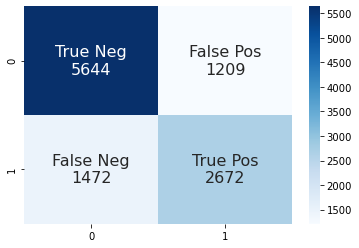

In [86]:
predsTest = model.predict(padded_test_docs)
roundedPredsTest = np.round(predsTest)
print('Confusion Matrix: Positive is class 1 and Negative is class 0')
cf_matrix = confusion_matrix(y_test, roundedPredsTest, labels = [1,0])
print(cf_matrix)
meplot.cf_matrix_heatmap(cf_matrix)

In [87]:
print(classification_report(y_test,roundedPredsTest))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67      4144
           1       0.79      0.82      0.81      6853

    accuracy                           0.76     10997
   macro avg       0.74      0.73      0.74     10997
weighted avg       0.75      0.76      0.75     10997



In [90]:
from tensorflow.keras.layers import LSTM
lstm = Sequential(
    [
        Embedding(vocab_size, 100, weights = [embedding_matrix], input_length = max_length, trainable = False),
        LSTM(100, dropout=0.2, recurrent_dropout=0.2, name = 'lstm'),
        Dense(1, activation = 'sigmoid', name="layer2")
    ]
)
lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
print(lstm.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 345, 100)          7522600   
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 100)               80400     
_________________________________________________________________
layer2 (Dense)               (None, 1)                 101       
Total params: 7,603,101
Trainable params: 80,501
Non-trainable params: 7,522,600
_________________________________________________________________
None


In [91]:
# fit the model
history = lstm.fit(padded_docs, 
                    y_train, 
                    epochs = 10, 
                    verbose = 1, 
                    batch_size = 32, 
                    validation_data = (padded_test_docs, y_test)
                   )

Epoch 1/10
698/698 [==============================] - 267s 378ms/step - loss: 0.6641 - acc: 0.6263 - val_loss: 0.6635 - val_acc: 0.6208
Epoch 2/10
698/698 [==============================] - 250s 359ms/step - loss: 0.6614 - acc: 0.6253 - val_loss: 0.6629 - val_acc: 0.6224
Epoch 3/10
698/698 [==============================] - 274s 392ms/step - loss: 0.6587 - acc: 0.6312 - val_loss: 0.6626 - val_acc: 0.6230
Epoch 4/10
698/698 [==============================] - 274s 392ms/step - loss: 0.6604 - acc: 0.6265 - val_loss: 0.6631 - val_acc: 0.6224
Epoch 5/10
698/698 [==============================] - 288s 412ms/step - loss: 0.6588 - acc: 0.6285 - val_loss: 0.6634 - val_acc: 0.6229
Epoch 6/10
698/698 [==============================] - 288s 412ms/step - loss: 0.6582 - acc: 0.6294 - val_loss: 0.6630 - val_acc: 0.6229
Epoch 7/10
698/698 [==============================] - 291s 417ms/step - loss: 0.6536 - acc: 0.6358 - val_loss: 0.6344 - val_acc: 0.6876
Epoch 8/10
698/698 [============================

Confusion Matrix: Positive is class 1 and Negative is class 0
[[6785   68]
 [4098   46]]


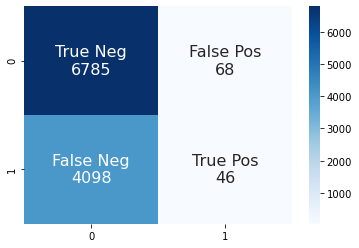

In [93]:
predsTest = lstm.predict(padded_test_docs)
roundedPredsTest = np.round(predsTest)
print('Confusion Matrix: Positive is class 1 and Negative is class 0')
cf_matrix = confusion_matrix(y_test, roundedPredsTest, labels = [1,0])
print(cf_matrix)
meplot.cf_matrix_heatmap(cf_matrix)

In [94]:
print(classification_report(y_test,roundedPredsTest))

              precision    recall  f1-score   support

           0       0.40      0.01      0.02      4144
           1       0.62      0.99      0.77      6853

    accuracy                           0.62     10997
   macro avg       0.51      0.50      0.39     10997
weighted avg       0.54      0.62      0.48     10997



From the above analysis we can see the tfidf+xgboost performance is better than word-embedding + rnn/lstm.

## AWD_LSTM
Using fastai in google colab Covid19_article_wordEmbedding_gcolab.ipynb

## Contextual string embeddings

## Transformers